In [1]:
import os
import numpy as np

from astropy.table import Table

import matplotlib.pyplot as plt
%matplotlib inline

from astropy.coordinates import SkyCoord 
import astropy.units as u

from sklearn.neighbors import NearestNeighbors
from sklearn import svm, tree
#from IPython.display import Math

D2R = np.pi/180.0

wdir = os.path.expanduser('~') + '/Dropbox/Work/Gaia-QSO'

In [9]:
import matplotlib as mp
import matplotlib.pyplot as plt
mp.rcParams['figure.figsize'] = (12, 8)

In [8]:
# read the Castle xmatch with DR2
url1 = 'http://vospace.esac.esa.int/vospace/sh/9da5bd4b841f4032ee3f94e2f357067a554434?dl=1'
t = Table.read(url1,format='votable')
nt = len(t)
# the total pm
mu = np.sqrt(t['pmra']**2 + t['pmdec']**2)
# propagate the errors, assuming pmra_error and pmdec_errors are uncorrelated
mu_error = np.sqrt((t['pmra']*t['pmra_error']/mu)**2 + (t['pmdec']*t['pmdec_error']/mu)**2)
#
t['mu'] = mu
t['mu_error'] = mu_error
#
print ("Total number of LQSO is {}".format(nt))


Total number of LQSO is 87


In [3]:
d = t.to_pandas()

In [63]:
d[~np.isnan(d.radius_percentile_lower)]

,qso_name,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,mu,mu_error,test


In [60]:
d.dropna()

,qso_name,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,mu,mu_error,test


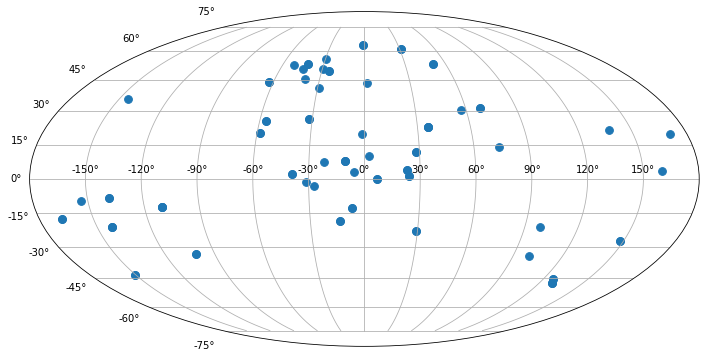

In [10]:
plt.subplot(111,projection="mollweide")
plt.scatter(d.ra*u.deg.to(u.rad)-np.pi,d.dec*u.deg.to(u.rad),s=60)
plt.grid()

In [14]:
coord = SkyCoord(d.ra,d.dec,unit='deg')

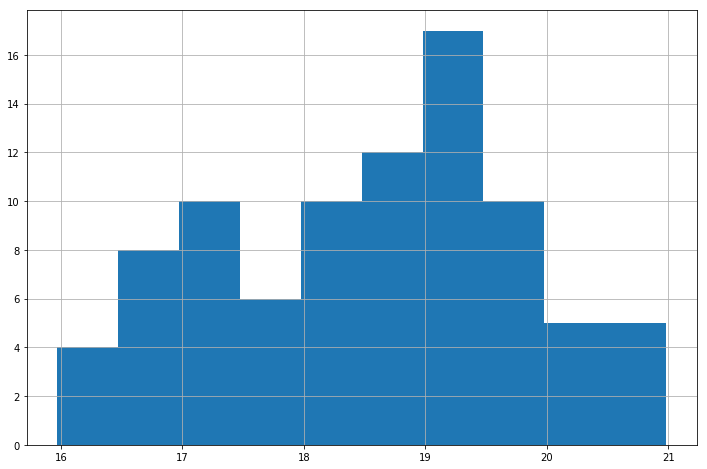

In [21]:
d.phot_g_mean_mag.hist()

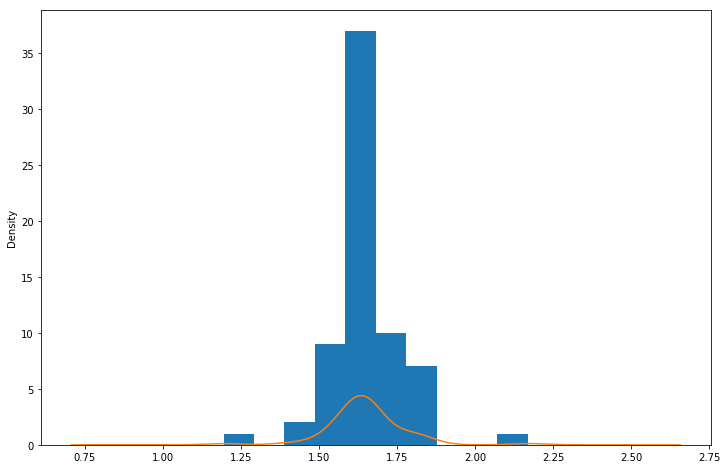

In [33]:
d.astrometric_pseudo_colour.hist()
d.astrometric_pseudo_colour.plot.kde()

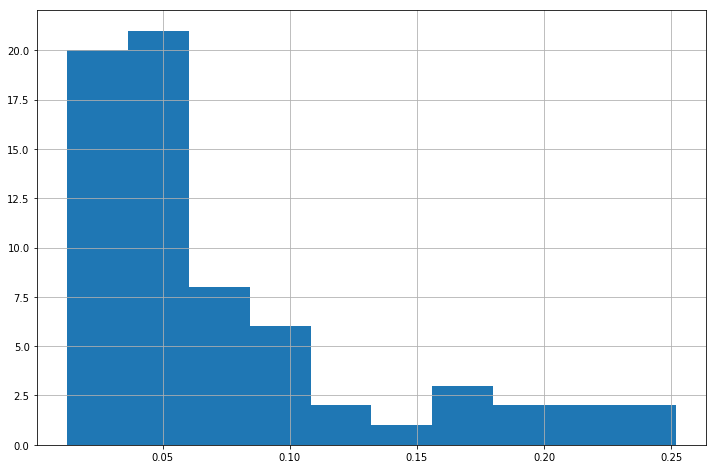

In [39]:
d.astrometric_pseudo_colour_error.hist()

In [36]:
d['test']=d.astrometric_pseudo_colour/d.astrometric_pseudo_colour_error

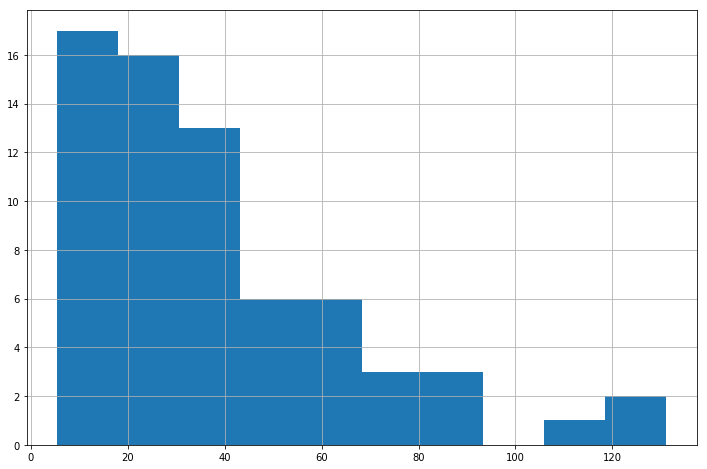

In [38]:
d.test.hist()

In [47]:
def getLQSO(d,center,r=10):
    s = d.copy()
    scale = u.arcsecond.to(u.deg)
    s['x'] = (d.ra-center.ra.deg)/scale
    s['y'] = (d.dec-center.dec.deg)/scale
    return s[np.power(s.x,2)+np.power(s.y,2)<r*r].copy()

def plotGaiaLense(dd,center,r=(-5,5),pm=True):
    d = getLQSO(dd,center)
    scale = u.arcsecond.to(u.deg)
    x = (d.ra-center.ra.deg)/scale
    y = (d.dec-center.dec.deg)/scale
    plt.errorbar(x,y,xerr=d.ra_error, yerr=d.dec_error,fmt='.')
    plt.scatter(x,y,s=100*np.exp(20-d.phot_g_mean_mag),c=d.astrometric_pseudo_colour)
    plt.colorbar()
    if pm : 
        vx = d.pmra
        vy = d.pmdec
        plt.quiver(x,y, vx, vy, angles='xy', scale_units='xy', scale=1)
        plt.errorbar(x+vx,y+vy,xerr=d.pmra_error, yerr=d.pmdec_error,fmt='o')
    plt.grid()
    plt.xlabel("gaia.ra - center.ra [\"]")
    plt.ylabel("gaia.dec - center.dec [\"]")
    plt.title(center)
    plt.xlim(r)
    plt.ylim(r)

In [44]:
getLQSO(d,HE0435)

,qso_name,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,mu,mu_error,test,x,y
11,b'HE0435-1223',1.635721e+18,b'Gaia DR2 3178020716638059136',3.178021e+18,869951248.0,2015.5,69.561604,0.180165,-12.287482,0.129359,...,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,1.011685,0.365414,36.518466,-1.355335,-0.330008
12,b'HE0435-1223',1.635721e+18,b'Gaia DR2 3178020716638059264',3.178021e+18,757197322.0,2015.5,69.562305,0.114541,-12.287314,0.097820,...,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,0.124200,0.199401,49.267001,1.168752,0.273047
13,b'HE0435-1223',1.635721e+18,b'Gaia DR2 3178020716638059392',3.178021e+18,623977900.0,2015.5,69.562038,0.281801,-12.287763,0.229808,...,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,1.863007,0.545569,31.531608,0.208083,-1.341481
14,b'HE0435-1223',1.635721e+18,b'Gaia DR2 3178020716640423680',3.178021e+18,231638665.0,2015.5,69.561885,0.153379,-12.287161,0.124867,...,NaN,NaN,NaN,b'http://geadata.esac.esa.int/data-server/data...,NaN,0.376718,0.297378,35.737317,-0.342424,0.825989


In [70]:
centers = d.groupby(d.qso_name)['ra','dec'].mean()

In [74]:
centers['coord'] = SkyCoord(centers.ra,centers.dec,unit='degree')

In [52]:
qso_names =  d.qso_name.unique()

In [45]:
HE0435 =  SkyCoord.from_name("HE 0435-1223")

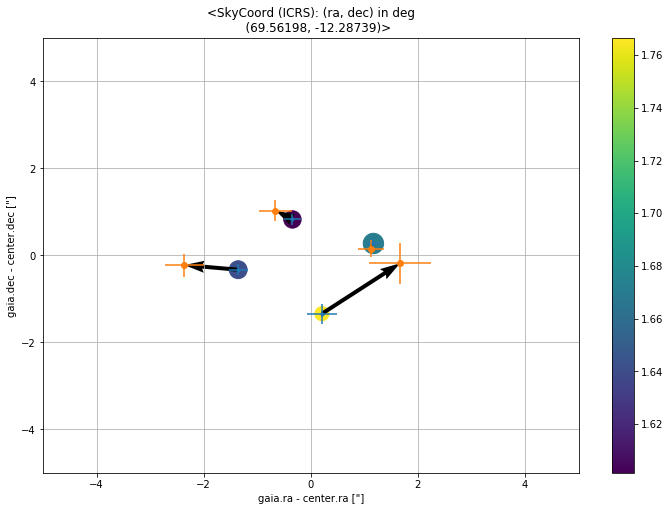

In [48]:
plotGaiaLense(d,HE0435)

In [58]:
qso_names

array([b'HE0047-1756', b'Q0142-100', b'QJ0158-4325', b'B0218+357',
       b'HE0230-2130', b'SDSS0246-0825', b'HE0435-1223', b'HE0512-3329',
       b'SDSS0746+4403', b'SDSS0806+2006', b'HS0810+2554',
       b'APM08279+5255', b'SDSS0903+5028', b'SBS0909+523',
       b'RXJ0921+4529', b'SDSS0924+0219', b'FBQ0951+2635',
       b'BRI0952-0115', b'Q0957+561', b'SDSS1001+5027', b'SDSS1004+4112',
       b'LBQS1009-0252', b'SDSS1021+4913', b'B1030+074', b'HE1104-1805',
       b'PG1115+080', b'RXJ1131-1231', b'SDSS1138+0314', b'SDSS1155+6346',
       b'B1152+200', b'SDSS1206+4332', b'Q1208+101', b'SDSS1226-0006',
       b'SDSS1332+0347', b'LBQS1333+0113', b'SDSS1353+1138',
       b'Q1355-2257', b'SDSS1406+6126', b'B1422+231', b'SBS1520+530',
       b'MG1549+3047', b'FBQ1633+3134', b'MG1654+1346', b'PKS1830-211',
       b'PMNJ1838-3427', b'WFI2026-4536', b'WFI2033-4723', b'B2108+213',
       b'HE2149-2745', b'Q2237+030', b'PSS2322+1944'], dtype=object)

In [59]:
len(qso_names)

51

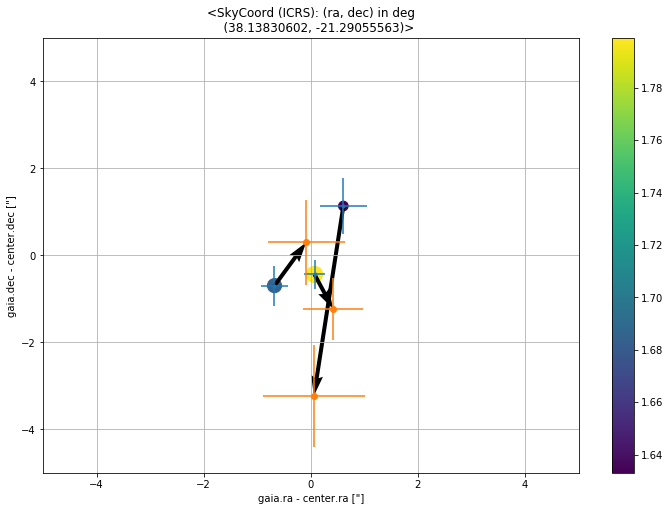

In [89]:
plotGaiaLense(d,centers.coord[10])

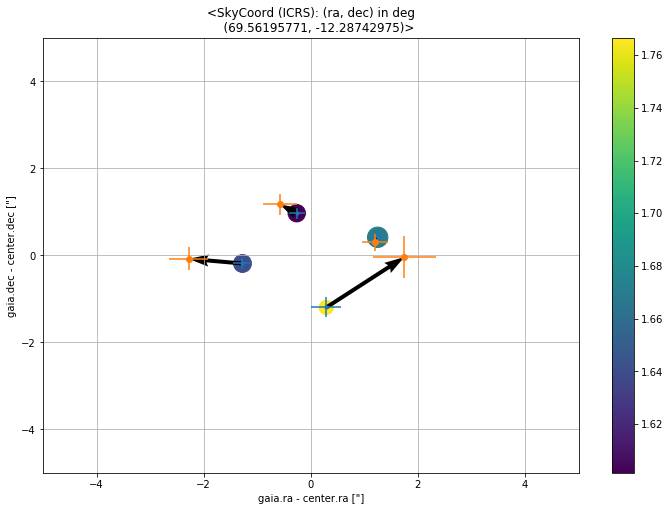

In [90]:
plotGaiaLense(d,centers.coord[11])

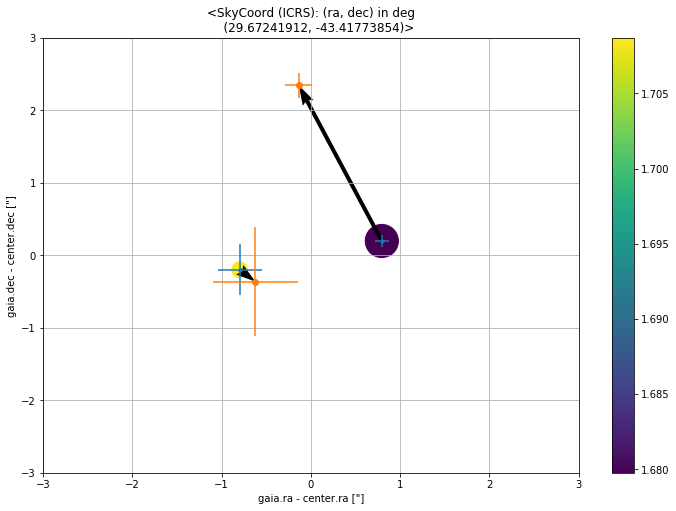

In [137]:
plotGaiaLense(d,centers.coord[29],r=(-3,3))

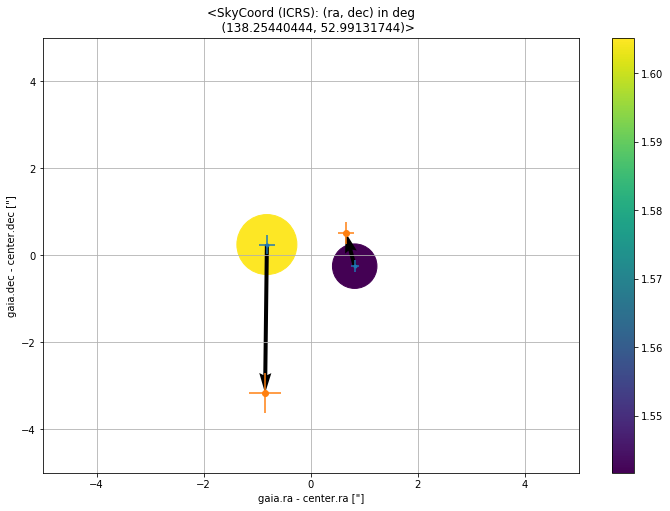

In [112]:
plotGaiaLense(d,centers.coord[32])

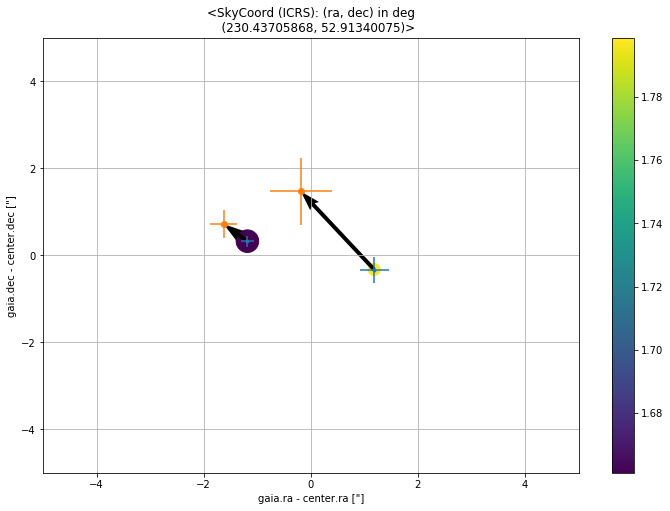

In [113]:
plotGaiaLense(d,centers.coord[33])

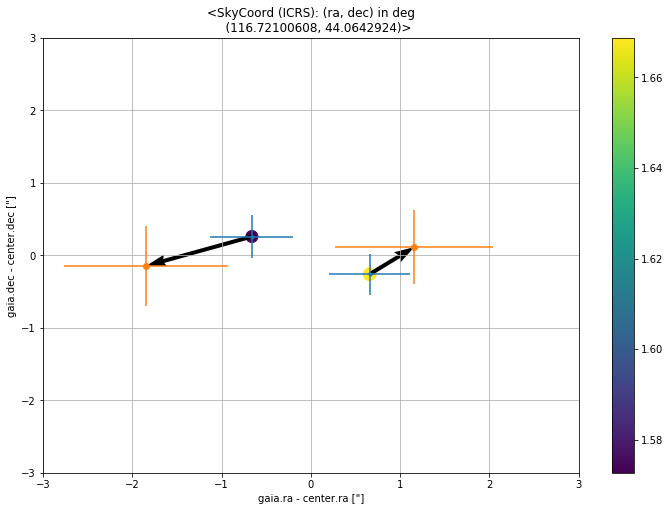

In [116]:
plotGaiaLense(d,centers.coord[35],r=(-3,3))

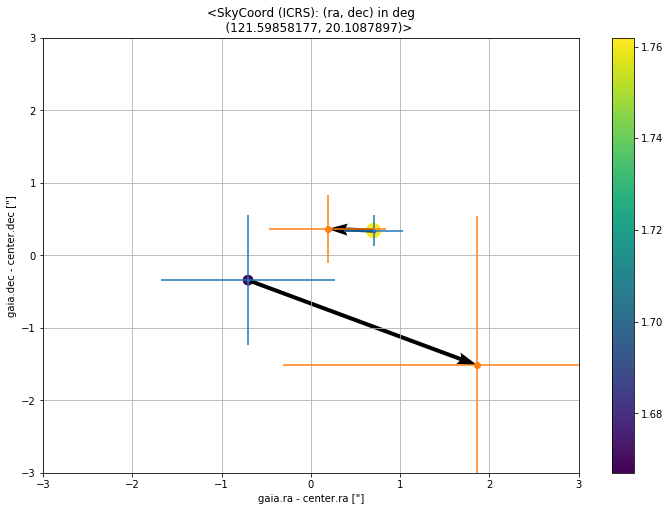

In [117]:
plotGaiaLense(d,centers.coord[36],r=(-3,3))

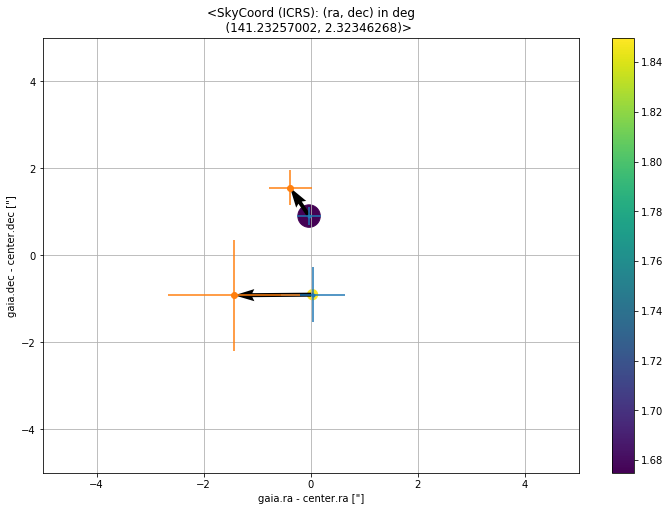

In [119]:
plotGaiaLense(d,centers.coord[38])

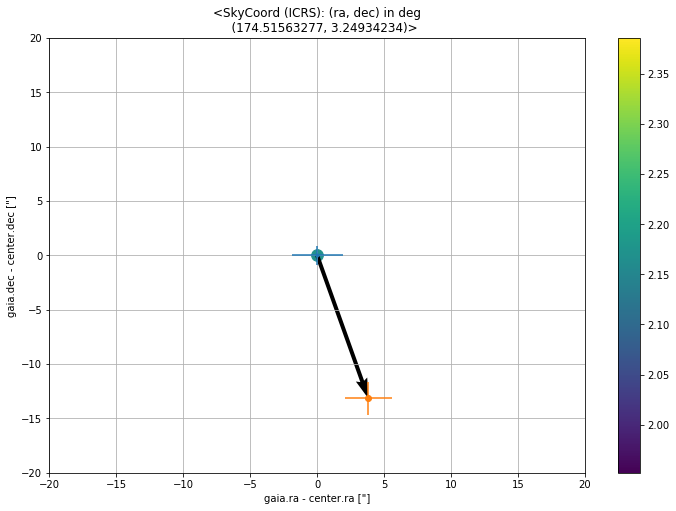

In [125]:
plotGaiaLense(d,centers.coord[42],r=(-20,20))

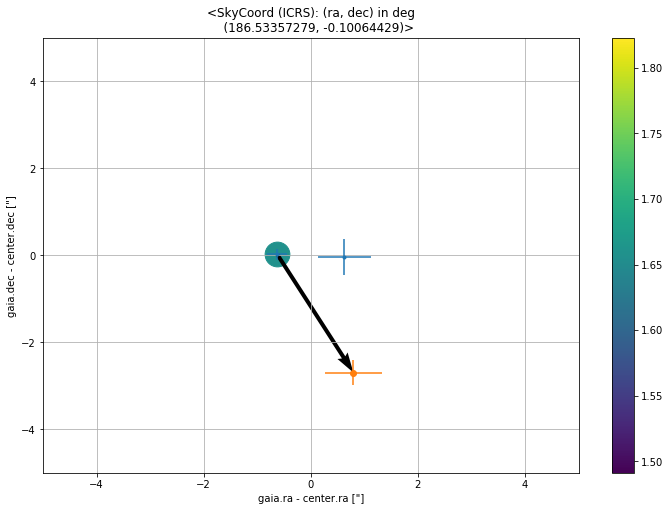

In [129]:
plotGaiaLense(d,centers.coord[45])

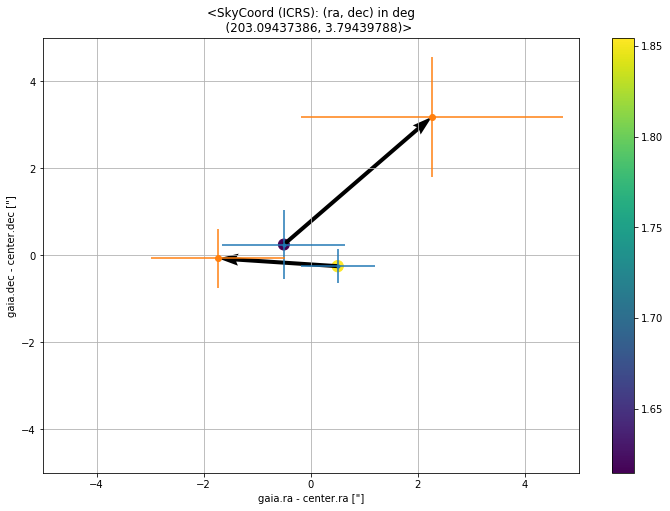

In [130]:
plotGaiaLense(d,centers.coord[46])

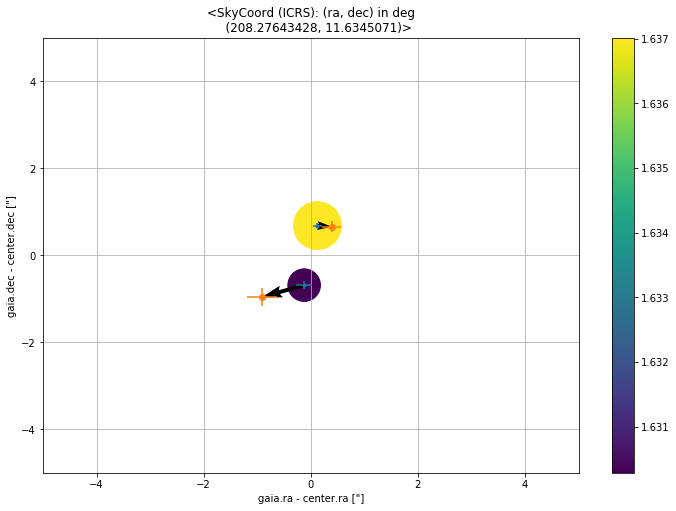

In [131]:
plotGaiaLense(d,centers.coord[47])

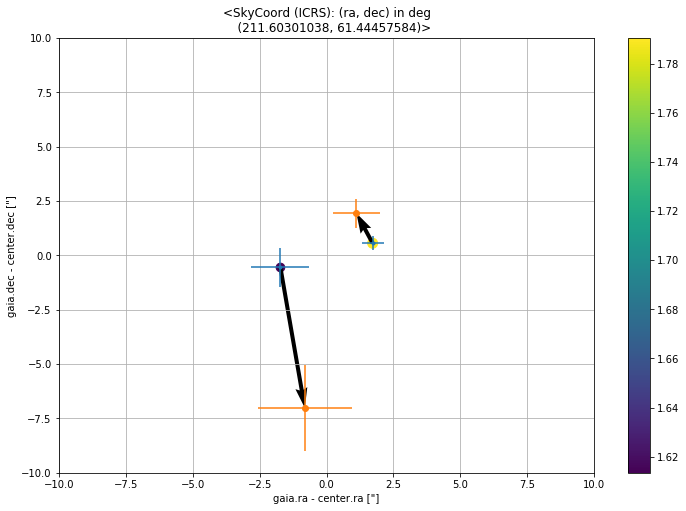

In [133]:
plotGaiaLense(d,centers.coord[48],r=(-10,10))

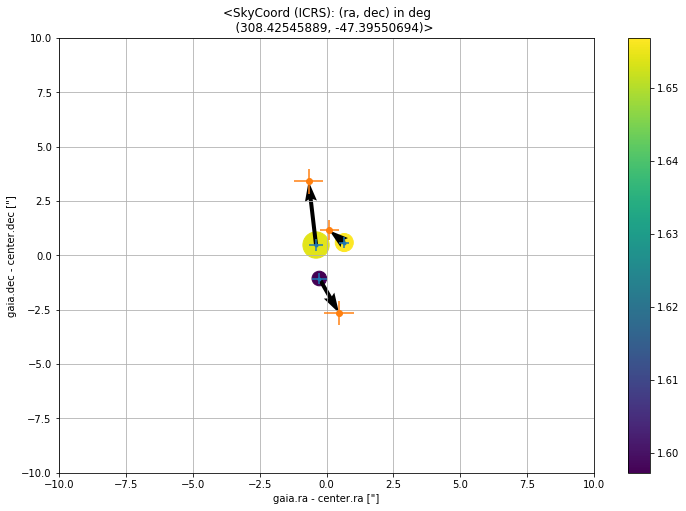

In [135]:
plotGaiaLense(d,centers.coord[50],r=(-10,10))